In [87]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv

In [160]:
img = cv.imread("F:/Dataset/Mammography/3_7/P_00044_RIGHT_CC.png")

img.shape[0], img.shape[1]

(4504, 2888)

0.8074792243767313 0.7766429840142096 0.17001385041551245 0.10523978685612789 


In [173]:
x_center= 0.8074792243767313*img.shape[1]
y_center= 0.7766429840142096*img.shape[0]
bb_width= 0.17001385041551245*img.shape[1]
bb_height= 0.10523978685612789*img.shape[0]
x_center,y_center,bb_width,bb_height

(2332.0, 3498.0, 490.99999999999994, 474.0)

In [174]:
x_tl=x_center-(bb_width/2)
y_tl=y_center-(bb_height/2)
x_br=x_center+(bb_width/2)
y_br=y_center+(bb_height/2)
x_tl,y_tl,x_br,y_br

(2086.5, 3261.0, 2577.5, 3735.0)

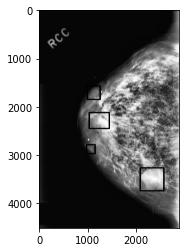

In [175]:
image = cv.rectangle(img, (int(x_tl),int(y_tl)), (int(x_br),int(y_br)), (0, 0, 0), 25)
plt.imshow(image, cmap='gray')
plt.show()

In [151]:
def createtxt(filename,data):
    file = open("F:/Dataset/Mammography/3_7/"+filename+".txt", "a")
    file.write(data)
    file.close()
createtxt("arroz",c)

In [179]:
os.chdir("F:/Dataset/Mammography/3_7")
for file in glob.glob("*.txt"):
    print(file)
    os.remove(file)

P_00001_LEFT_CC.txt
P_00001_LEFT_MLO.txt
P_00004_LEFT_CC.txt
P_00004_LEFT_MLO.txt
P_00004_RIGHT_MLO.txt
P_00009_RIGHT_CC.txt
P_00009_RIGHT_MLO.txt
P_00015_LEFT_MLO.txt
P_00016_LEFT_CC.txt
P_00016_LEFT_MLO.txt
P_00017_LEFT_CC.txt
P_00017_LEFT_MLO.txt
P_00018_RIGHT_CC.txt
P_00018_RIGHT_MLO.txt
P_00021_LEFT_CC.txt
P_00021_LEFT_MLO.txt
P_00021_RIGHT_CC.txt
P_00021_RIGHT_MLO.txt
P_00023_RIGHT_CC.txt
P_00023_RIGHT_MLO.txt
P_00026_LEFT_CC.txt
P_00026_LEFT_MLO.txt
P_00027_RIGHT_CC.txt
P_00027_RIGHT_MLO.txt
P_00032_RIGHT_CC.txt
P_00032_RIGHT_MLO.txt
P_00034_RIGHT_CC.txt
P_00034_RIGHT_MLO.txt
P_00037_RIGHT_CC.txt
P_00037_RIGHT_MLO.txt
P_00039_RIGHT_CC.txt
P_00039_RIGHT_MLO.txt
P_00041_LEFT_CC.txt
P_00041_LEFT_MLO.txt
P_00044_RIGHT_CC.txt
P_00044_RIGHT_MLO.txt
P_00045_LEFT_CC.txt
P_00045_LEFT_MLO.txt
P_00046_RIGHT_MLO.txt
P_00051_LEFT_CC.txt
P_00051_LEFT_MLO.txt
P_00054_RIGHT_MLO.txt
P_00055_LEFT_CC.txt
P_00056_LEFT_MLO.txt
P_00057_RIGHT_CC.txt
P_00057_RIGHT_MLO.txt
P_00058_RIGHT_CC.txt
P_00059_L

In [180]:
import os
import glob 
os.chdir("F:/Dataset/Mammography/3_1")

old_patient=""
actual_patient="/"
for file in glob.glob("*_mask.png"):
    countour=[]
    img = cv.imread(f'F:/Dataset/Mammography/3_1/{file}',0)
    kernel = np.ones((3,3), np.uint8)
    img_erosion = cv.erode(img, kernel, iterations=1)
    img_dilation = cv.dilate(img_erosion, kernel, iterations=1)
    contours, hierarchy = cv.findContours(img_dilation, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_NONE)
    countour=contours[0]
    if len(contours) >1:
        for i in range(len(contours)):
            if(len(countour)<len(contours[i])):
                countour=contours[i]
    M = cv.moments(countour)
    cX = int(M["m10"] / M["m00"])
    cY = int(M["m01"] / M["m00"])  
    X_ax = []
    Y_ax = []
    for i in countour:           
        X_ax.append(i[0][0])
        Y_ax.append(i[0][1])
    ponto_menor=[np.int64(min(X_ax)).item()-50,np.int64(min(Y_ax)).item()-50]
    ponto_maior=[np.int64(max(X_ax)).item()+50, np.int64(max(Y_ax)).item()+50]
    bb_size=[ponto_maior[0]-ponto_menor[0], ponto_maior[1]-ponto_menor[1]]
    filesplit = file.split("_")
    filename= filesplit[0]+"_"+filesplit[1]+"_"+filesplit[2]+"_"+filesplit[3]
    classe = "0"
    x_center = str(cX/img.shape[1])
    y_center = str(cY/img.shape[0])
    bb_size_width = str(bb_size[0]/img.shape[1])
    bb_size_height = str(bb_size[1]/img.shape[0])
    data= " ".join((classe, x_center,y_center,bb_size_width,bb_size_height,"\n"))
    createtxt(filename,data)
    print(filename)

P_00001_LEFT_CC
P_00001_LEFT_MLO
P_00004_LEFT_CC
P_00004_LEFT_MLO
P_00004_RIGHT_MLO
P_00009_RIGHT_CC
P_00009_RIGHT_MLO
P_00015_LEFT_MLO
P_00016_LEFT_CC
P_00016_LEFT_MLO
P_00017_LEFT_CC
P_00017_LEFT_MLO
P_00018_RIGHT_CC
P_00018_RIGHT_MLO
P_00021_LEFT_CC
P_00021_LEFT_MLO
P_00021_RIGHT_CC
P_00021_RIGHT_MLO
P_00023_RIGHT_CC
P_00023_RIGHT_MLO
P_00026_LEFT_CC
P_00026_LEFT_MLO
P_00027_RIGHT_CC
P_00027_RIGHT_MLO
P_00032_RIGHT_CC
P_00032_RIGHT_MLO
P_00034_RIGHT_CC
P_00034_RIGHT_MLO
P_00037_RIGHT_CC
P_00037_RIGHT_MLO
P_00039_RIGHT_CC
P_00039_RIGHT_MLO
P_00041_LEFT_CC
P_00041_LEFT_MLO
P_00044_RIGHT_CC
P_00044_RIGHT_CC
P_00044_RIGHT_CC
P_00044_RIGHT_CC
P_00044_RIGHT_MLO
P_00044_RIGHT_MLO
P_00045_LEFT_CC
P_00045_LEFT_MLO
P_00046_RIGHT_MLO
P_00051_LEFT_CC
P_00051_LEFT_MLO
P_00054_RIGHT_MLO
P_00055_LEFT_CC
P_00056_LEFT_MLO
P_00057_RIGHT_CC
P_00057_RIGHT_MLO
P_00058_RIGHT_CC
P_00059_LEFT_CC
P_00059_LEFT_MLO
P_00061_RIGHT_CC
P_00061_RIGHT_MLO
P_00064_RIGHT_MLO
P_00065_LEFT_CC
P_00065_LEFT_MLO
P_00066_L

In [146]:
cX,cY,bb_size,ponto_menor,ponto_maior,img.shape[0],img.shape[1]

(444, 2640, [447, 533], [240, 2392], [687, 2925], 4808, 3024)

In [147]:
cY/img.shape[0],cX/img.shape[1],bb_size[0]/img.shape[1],bb_size[1]/img.shape[0]

(0.5490848585690515,
 0.14682539682539683,
 0.14781746031746032,
 0.11085690515806988)

In [139]:
b=(15,10,11,12,13)
str(b)
a="asd"
b="asddd"
c=" ".join((a,b))
c

'asd asddd'

In [119]:
M = cv.moments(countour)
cX = int(M["m10"] / M["m00"])
cY = int(M["m01"] / M["m00"])

In [121]:
cX,cY

(444, 2640)

In [ ]:
os.chdir("F:/Dataset/Mammography/3_1")
img_id= 0
seg_id=1
old_patient=""
actual_patient="/"
for file in glob.glob("*_mask.png"):
    countour=[]
    img = cv.imread(f'F:/Dataset/Mammography/3_1/{file}',0)
    kernel = np.ones((3,3), np.uint8)
    img_erosion = cv.erode(img, kernel, iterations=1)
    img_dilation = cv.dilate(img_erosion, kernel, iterations=1)
    contours, hierarchy = cv.findContours(img_dilation, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_NONE)
    countour=contours[0]
    if len(contours) >1:
        for i in range(len(contours)):
            if(len(countour)<len(contours[i])):
                countour=contours[i]
            
    filesplit = file.split("_")
    filename= filesplit[0]+"_"+filesplit[1]+"_"+filesplit[2]+"_"+filesplit[3]+".png"
    # try:
    #     filesplit = glob.glob("*_mask.png")[i+1].split("_")
    # except:
    #     filesplit = glob.glob("*_mask.png")[i].split("_")
        
    actual_patient = filesplit[0]+"_"+filesplit[1]+"_"+filesplit[2]+"_"+filesplit[3]
    
    if old_patient != actual_patient:
        img_id=img_id+1
        old_patient=actual_patient
        Write_json_image_dict(img_id,img,filename)
    
    print(file)
    print(img_id)
    index=0
    X_ax = []
    Y_ax = []
    all_points=[]
    for i in countour:
        for j in range(2):
            all_points.append(np.int64(i[0][j]).item())
            
        X_ax.append(i[0][0])
        Y_ax.append(i[0][1])
    dictionary2[0]=all_points
    all_points_tuple=tuple(all_points)
    ponto_menor=[np.int64(min(X_ax)).item()-30,np.int64(min(Y_ax)).item()-30]
    ponto_maior=[np.int64(min(X_ax)).item()+30, np.int64(min(Y_ax)).item()+30]
    # ponto_menor=np.int16(ponto_menor).item()
    # ponto_maior=np.int16(ponto_maior).item()
    bb_size=[ponto_menor[0],ponto_menor[1], ponto_maior[0]-ponto_menor[0], ponto_maior[1]-ponto_menor[1]]
    bb_size=tuple(bb_size)
    area=cv.contourArea(countour)
    # print(area)
    area=np.int64(area).item()
    # print(area)
    Write_json_anotations(seg_id,img_id,all_points_tuple,area,bb_size)
    seg_id=seg_id+1

In [2]:
path = "file:///E:/Dataset/Mammography/3_7/image/P_00001_LEFT_CC.png"
path_=path.split("///")
path_[1]


'E:/Dataset/Mammography/3_7/image/P_00001_LEFT_CC.png'